****
<a id='lesson-2'></a>
# Lesson-2: Logistic Map
****

## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map



## Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52
1. Comment

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fixed_point

In [30]:
alphas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52]
x0_values = np.linspace(0.11, 0.99, 9)
num_iterations = 20

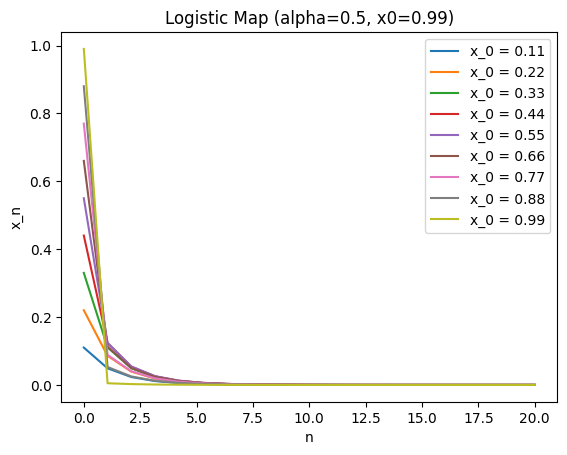

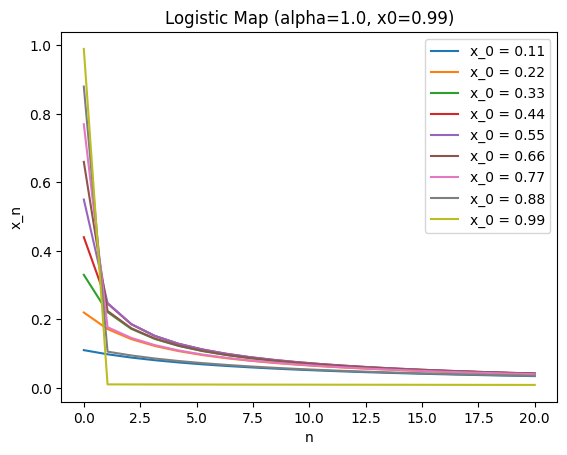

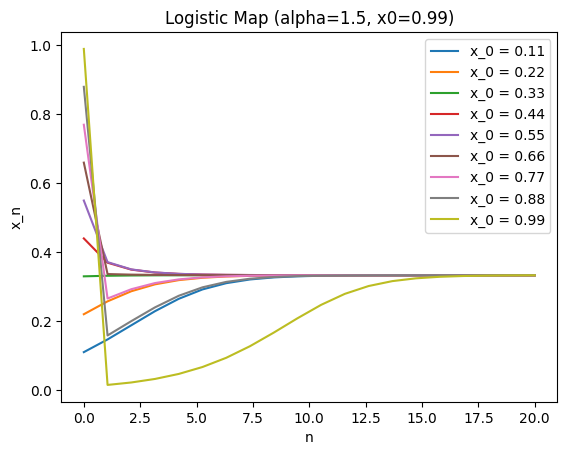

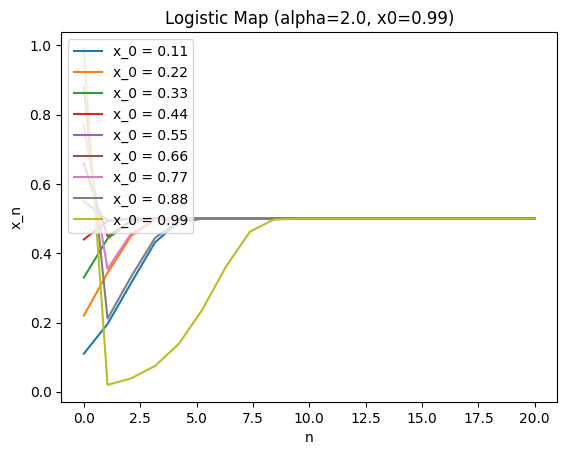

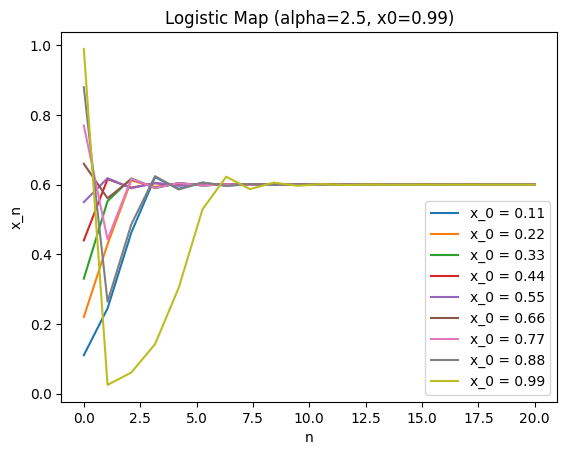

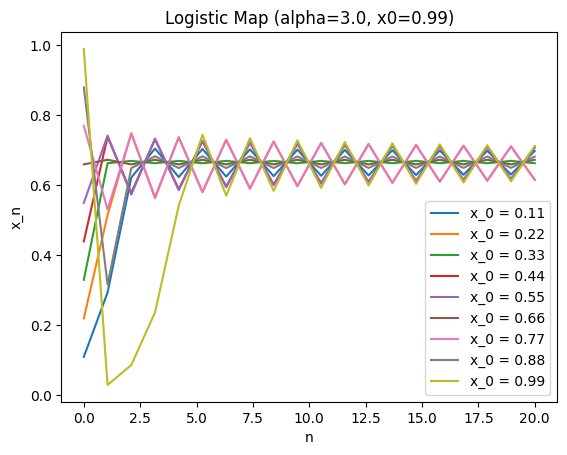

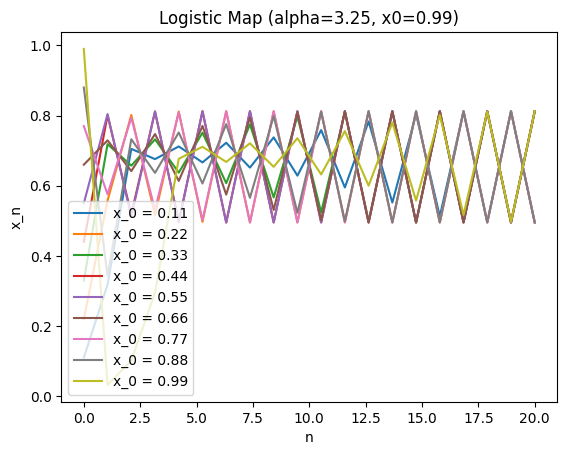

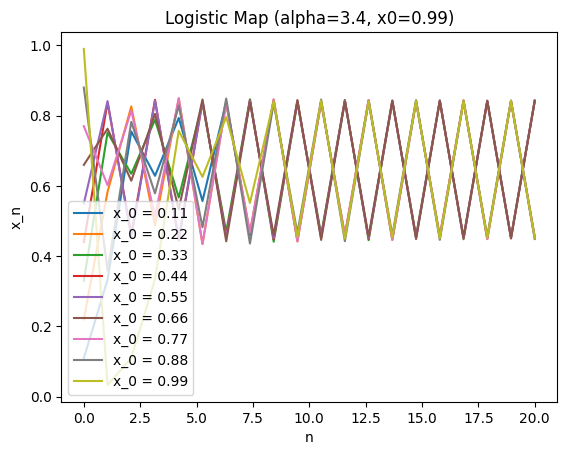

/tmp/ipykernel_32170/982603856.py:6: RuntimeWarning: overflow encountered in scalar multiply
  xn[i] = alpha * xn[i-1] * (1 - xn[i-1])


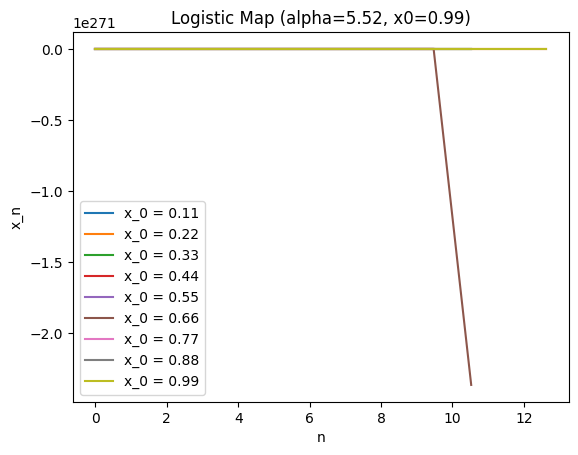

In [31]:
def logistic_map(alpha, x0, num_iterations):
    xn = np.zeros(num_iterations)
    xn[0] = x0

    for i in range(1, num_iterations):
        xn[i] = alpha * xn[i-1] * (1 - xn[i-1])

    n = np.linspace ( 0, num_iterations, num_iterations)
    plt.plot(n, xn, label=f'x_0 = {x0}')

for alpha in alphas:
    for x0 in x0_values:
        logistic_map(alpha, x0, num_iterations)
    plt.xlabel('n')
    plt.ylabel('x_n')
    plt.title(f'Logistic Map (alpha={alpha}, x0={x0})')
    plt.legend()
    plt.show()


the logistic map diagrams for the given alpha values, I am taking the example of population analysis to explain the graph and the values instide:

 -  For α = 0.5: the logistic map will exhibit simple and stable behavior. The population will converge to a single point after a few iterations.

  -  α = 1.0:
    At α = 1.0, the logistic map will show oscillatory behavior. The population will cycle between two values in a regular manner.

  -  α = 1.5:
    For α = 1.5, the logistic map will exhibit period-doubling bifurcation. The population will oscillate between two values initially, but as the iterations progress, the oscillations will become more complex and exhibit periodic doubling.

  -  α = 2.0:
    At α = 2.0, the logistic map will display chaotic behavior. The population will no longer settle into a periodic pattern but will exhibit a sensitive dependence on initial conditions. Small changes in the initial population value will lead to significantly different outcomes as the iterations progress.

  -  α = 2.5:
    For α = 2.5, the logistic map will continue to exhibit chaotic behavior. The population will show even greater sensitivity to initial conditions and demonstrate more complex patterns.

  -  α = 3.0:
    At α = 3.0, the logistic map will still be chaotic, but the dynamics will become more organized. The population will exhibit periodic windows amidst the chaotic behavior.

  -  α = 3.25:
    For α = 3.25, the logistic map will display period-doubling bifurcations repeatedly. The population will demonstrate a series of periodic windows interspersed with chaotic regions.

  -  α = 3.4:
    At α = 3.4, the logistic map will show chaotic behavior but with increasingly rare windows of periodicity. The population will exhibit complex patterns that are difficult to predict.

  -  α = 5.5:
    For α = 5.5, the logistic map will exhibit what is known as "strange attractor" behavior. The population will no longer display any regular or periodic patterns but will occupy a fractal region in phase space.the logistic map diagrams for the given alpha values:


## Task-2
Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps.



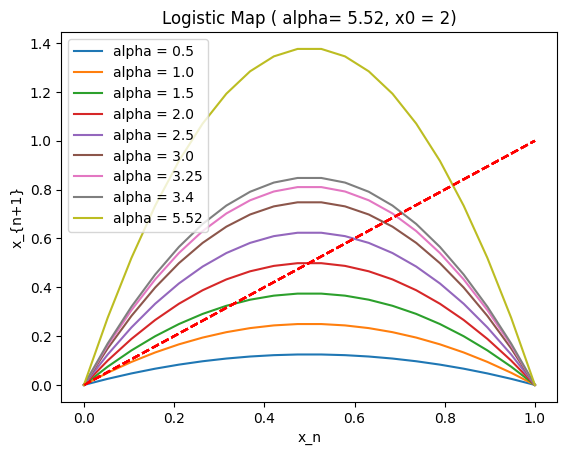

In [32]:
def logistic_phase_plot(alpha, x0, num_steps):
    y_axis = []
    x_axis = np.linspace(0, 1, num_steps)
    for x in x_axis:
        y_axis.append ( alpha * x * (1 - x))
    plt.plot( x_axis, y_axis, label=f'alpha = {alpha}' )
    plt.plot( x_axis, x_axis, color='red', linestyle="dashed")

x0 = 2

for alpha in alphas:
    logistic_phase_plot ( alpha, x0, num_iterations)
plt.xlabel ('x_n')
plt.ylabel ( 'x_{n+1}')
plt.title (f'Logistic Map ( alpha= {alpha}, x0 = {x0})')
plt.legend()
plt.show()

## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$.<br>

Solution: consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$.  


### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$

1. Find roots of $f^{(n)}(x)=0$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$
2. Check the stability of the roots. 
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

Alternatively: 
$ \frac{d}{dx} f^{(n)}(x) = \frac{df(x_{n-1})}{dx}  \frac{d}{dx} f^{(n-1)}(x)  = \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} f^{(n-1)}(x_{n-1}) $, which is a recursive formula for the derivative!


\begin{align*}
\text{Denote } x_n &= f^{(n)}(x) \\
\frac{d}{dx} f^{(n)}(x) &= \frac{d}{dx} x_n = \frac{d}{dx} f(x_{n-1}) \\
&= \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} x_{n-1} \\
\text{with } x_0 &= x \implies \frac{d}{dx} x_0 = 1
\end{align*}


$$ \frac{d}{dx} f^{(n)}(x)  = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) = f^\prime(x_{(n-1)}) \frac{d}{dx} x_{(n-1)} \text{ where }f^\prime(x)=\alpha (1-2x) \text{ and }\frac{d}{dx}x_0 = 1$$

So that $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0)\text{ where }x_0=x\text{ and }x_n=f^{(n)}(x_0)$$
and use `scipy.optimize.fixed_point`


In [33]:
def logistic_map(alpha, x0, num_iterations):
    xn = np.zeros(num_iterations+1)
    xn[0] = x0

    try:
        for i in range( 1, num_iterations+1):
            xn[i] = alpha * xn[i-1] * (1 - xn[i-1])
    except IndexError:
            return xn[0]
    return xn

def last_n (x0, alpha, num_iterations):
    xn = np.zeros(num_iterations+1)
    xn[0] = x0

    try:
        for i in range(1, num_iterations+1):
            xn[i] = alpha * xn[i-1] * (1 - xn[i-1])
    except IndexError:
        return xn[0]
    return xn[-1]

def logistic_derivative ( alpha, x):
    deri = alpha *( 1 - 2* x)
    return deri

def find_steady_states(alpha, x0, num_iterations):
    for iter in range(0,num_iterations):
        try:
            ss1 = fixed_point(last_n, x0, args=(alpha,iter+1))
        except RuntimeError:
            pass
        otherss = logistic_map ( alpha, ss1, iter+1)
        otherss = list (otherss)
        fndash = 1
        for ss in otherss:
            fndash *= logistic_derivative ( alpha, ss)
        if abs(fndash) <= 1:
            return otherss

x0 = 0.5
num_iterations = 100

for alpha in alphas:
    steady_states = find_steady_states(alpha, x0, num_iterations)
    print (f'\nFor alpha = {alpha}:')
    if len(steady_states) > 0:
        for i, state in enumerate(steady_states):
            print(f"Steady state {i+1}: x = {state}")
    else:
        print(f"No steady states found for alpha={alpha}")



For alpha = 0.5:
Steady state 1: x = 0.0
Steady state 2: x = 0.0

For alpha = 1.0:
Steady state 1: x = 3.7416079336843815e-09
Steady state 2: x = 3.741607919684752e-09

For alpha = 1.5:
Steady state 1: x = 0.3333333333333333
Steady state 2: x = 0.33333333333333337

For alpha = 2.0:
Steady state 1: x = 0.5
Steady state 2: x = 0.5

For alpha = 2.5:
Steady state 1: x = 0.6
Steady state 2: x = 0.6000000000000001

For alpha = 3.0:
Steady state 1: x = 0.6665691842254976
Steady state 2: x = 0.6667641205993567
Steady state 3: x = 0.6665691842421696

For alpha = 3.25:
Steady state 1: x = 0.4952651682454743
Steady state 2: x = 0.8124271394468331
Steady state 3: x = 0.4952651682454746

For alpha = 3.4:
Steady state 1: x = 0.4519632476261529
Steady state 2: x = 0.8421543994326706
Steady state 3: x = 0.451963247626153

For alpha = 5.52:
Steady state 1: x = 0.5000000000000001
Steady state 2: x = 1.38
Steady state 3: x = -2.8946879999999986
Steady state 4: x = -62.231964527738825



## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.



/tmp/ipykernel_32170/2815557082.py:8: RuntimeWarning: overflow encountered in scalar multiply
  x = alpha * x_list[-1] * (1 - x_list[-1])


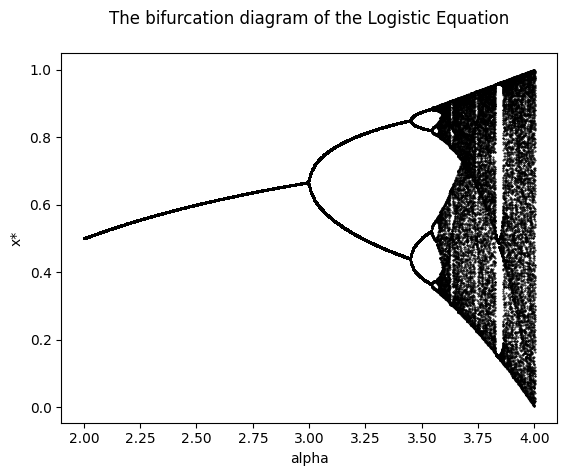

In [34]:
alphas = np.linspace(2.0, 4.1, 1000)
x0 = 0.3
N = 500

def logis(alpha):
    x_list = [x0]
    for _ in range(N-1):
        x = alpha * x_list[-1] * (1 - x_list[-1])
        x_list.append(x)
    return x_list[400:]

x_list = []
rep_alphas = []

for alpha in alphas:
    x_list.append(logis(alpha))
    rep_alphas.append([alpha] * 100)

x_list = np.array(x_list).ravel()
rep_alphas = np.array(rep_alphas).ravel()

plt.xlabel('alpha')
plt.ylabel('x*')
plt.title('The bifurcation diagram of the Logistic Equation\n')
plt.scatter(rep_alphas, x_list, color='black', s=0.2)
plt.show()

## As you can see this plot represents, how the stable points bifurcate and show Chaotic behaviour.

- From alpha 2 to 3, there is only 1 stable point.
- After that the stable point splits into two parts, and now there are 2 stable points
- Again at about 3.45 the stable points split again and gives rise to 4 stable points
- Same way after every exponentially decreasing lengths, the stable points split into 2.

- But at about 3.89, it shows peculiar behaviour where all other stable points converge and there are exactly 3 stable points
- From here again the splitting starts and induces chaotic behaviour.

- But after 4 the stable points start becoming negetive and causes overflow and gives a runtime warning.


## Task-5
Find the ratio between two consequtive bifurcations.

In [35]:
maxIt = 10
maxItJ = 100
a_1 = 1.0
a_2 = 0.0
ratio_prev = 3.2
for i in range(2, maxIt):
    a = a_1 + (a_1 - a_2) / ratio_prev
    for j in range(maxItJ):
        x = 0
        derivative = 0
        for k in range(2 ** i):
            derivative = 1 - 2 * derivative * x
            x = a - x * x    
        a = a - x / derivative
    ratio = (a_1 - a_2) / (a - a_1)
    ratio_prev = ratio
    a_2 = a_1
    a_1 = a
    print (f"The ratio at alpha = {2+a} is given by: ", ratio)

print ("ratio of consecutive bifurcations is a universal constant \ncalled Feigenbaum's constant given by: ", ratio)

The ratio at alpha = 3.310702641336833 is given by:  3.2185114220380866
The ratio at alpha = 3.381547484432062 is given by:  4.3856775985683365
The ratio at alpha = 3.396945359704561 is given by:  4.600949276538056
The ratio at alpha = 3.400253081214783 is given by:  4.6551304953919646
The ratio at alpha = 3.400961962944842 is given by:  4.666111947822846
The ratio at alpha = 3.4011138049397758 is given by:  4.6685485815061005
The ratio at alpha = 3.4011463258269465 is given by:  4.669060660493283
The ratio at alpha = 3.4011532908499253 is given by:  4.669171554440429
ratio of consecutive bifurcations is a universal constant 
called Feigenbaum's constant given by:  4.669171554440429
